# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

1. What are you being asked to do? 

In this case, TikTok aims to identify videos violating their terms of service more efficiently by using a machine learning model, where the model needs to distinguish between claims and opinions.

Opinions will be less likely to undergo human review
Claims will be prioritized based on the number of reports. 

2. What metric should I use to evaluate success of my business/organizational objective?

Our target value will be `claim_status`, a binary feature that indiscates if a video is a claim or opinion. (since we are working with a Binary, the model to use will be classification)


3. What are the ethical implications of the model? What are the consequences of your model making errors?

We are prioritizing false positives over false negatives in this case:
The worst consequence of misclassifying an opinion as a claim will result in a human review, but misclassifying a claim as an opinion could lead to a terms-of-service violation. 

4. How would you proceed?

There are about 20,000 videos. after pre-processing we need to:

- We separate our data into Train/test (60% train,  20% validate, and 20% test)
- Training and model optimization
- Selection of model
- Evaluation 


### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [2]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

What are some purposes of EDA before constructing a logistic regression model?

* The purposes are to verify model assumptions (no severe multicollinearity), and to identify data anomalies (outliers, class imbalance, distribution, etc).


### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
data.head(n= 10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
data.describe()
# data.describe(include= 'all')

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Since there are a small ammount of nullsand it is less than 5% of the dataset, we can drop them the observations (1.5%)

In [10]:
# Drop rows with missing values
data = data.dropna(axis= 0) #by rows 

In [11]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
data.duplicated().sum()


0

Check for and handle outliers.

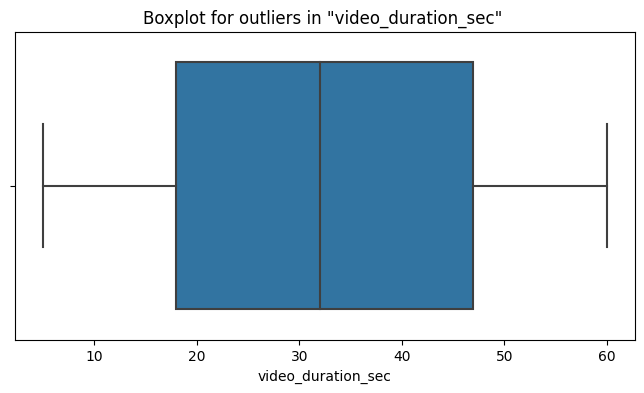

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`

plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_duration_sec)
plt.title('Boxplot for outliers in "video_duration_sec" ')
plt.show()


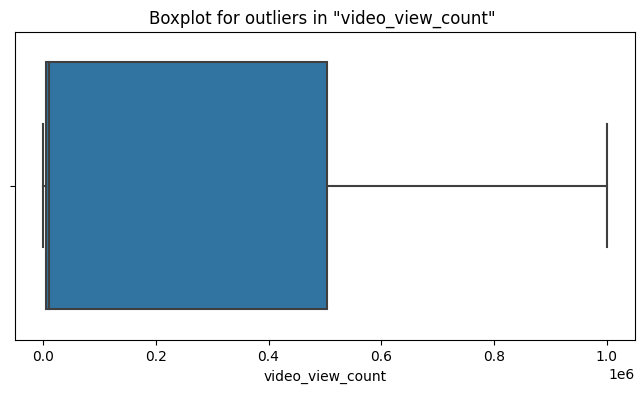

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_view_count)
plt.title('Boxplot for outliers in "video_view_count" ')
plt.show()


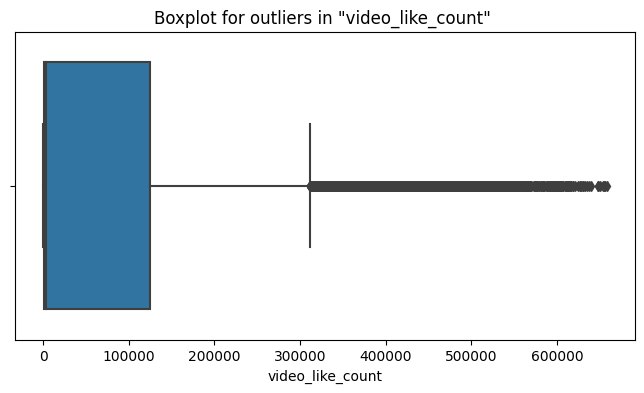

In [15]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_like_count)
plt.title('Boxplot for outliers in "video_like_count" ')
plt.show()

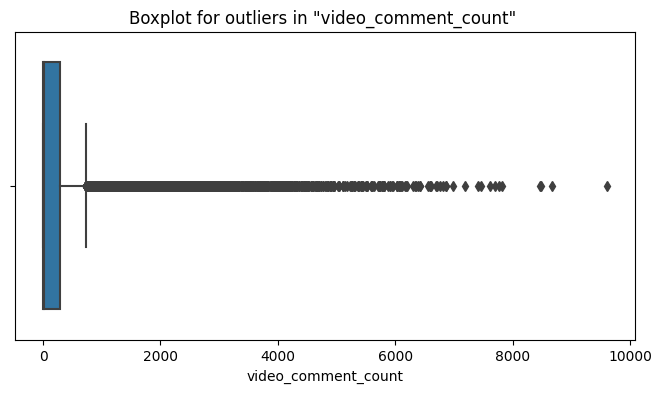

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize= (8,4))
sns.boxplot(x= data.video_comment_count)
plt.title('Boxplot for outliers in "video_comment_count" ')
plt.show()


In [17]:
# Check for and handle outliers for video_like_count

#defininf the quantiles
q1 = data['video_like_count'].quantile(0.25)
q3 = data['video_like_count'].quantile(0.25)

#defining the Upper limit 
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)

#Transforming outliers into limit values
data.loc[data['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit #This changes the values of
                                                                                   #outliers into the last accepted value   


In [18]:
# Check for and handle for video_comment_count

#defininf the quantiles
q1 = data['video_comment_count'].quantile(0.25)
q3 = data['video_comment_count'].quantile(0.25)

#defining the Upper limit 
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)

#Transforming outliers into limit values
data.loc[data['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit #This changes the values of
                                                                                         #outliers into the last accepted value   



Check class balance.

In [28]:
# Check class balance for video_comment_count
data['claim_status'].value_counts(normalize= True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Approximately 50.3% of the dataset represents videos with claims and 49.7 represents videos with opinions, so the outcome if Claim_status is Balanced.

Use resampling to create class balance in the outcome variable, if needed.

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [21]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions             
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.563017


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [22]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

                                                                           #applies the function to each row in DF       
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text)) #apply function len to text

In [23]:
# Display first few rows of dataframe after adding new column
data_upsampled.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,810.75,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,810.75,19034.0,1161.0,1.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,810.75,2858.0,833.0,1.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,810.75,34812.0,1234.0,1.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,810.75,4110.0,547.0,1.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

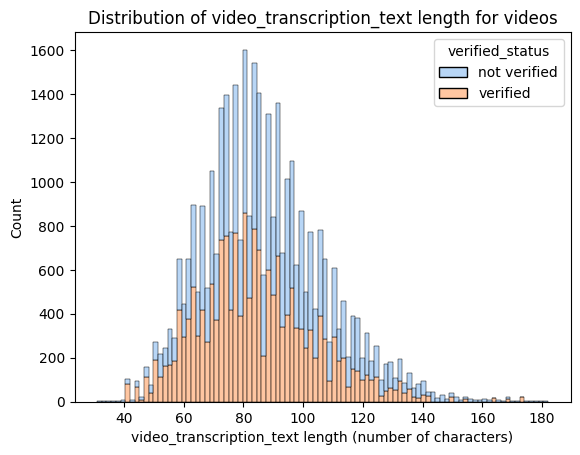

In [24]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data     =data_upsampled,
             x        ="text_length",  
             multiple ="stack",         #stacking bars
             palette  ="pastel", 
             hue      ="verified_status"
             )
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos")
plt.show()


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [25]:
# Code a correlation matrix to help determine most correlated variables
corr_tab = data_upsampled.drop(['claim_status', 'video_transcription_text','verified_status','author_ban_status'], axis= 1)
corr_tab.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.001369,-0.011800,-0.698969,-0.368509,-0.503634,-0.489758,-0.347271,-0.196817
video_id,-0.001369,1.000000,0.013938,0.001607,0.003747,0.009136,0.006814,0.002456,-0.007634
video_duration_sec,-0.011800,0.013938,1.000000,0.013892,-0.014597,0.001944,0.006930,-0.026395,-0.005043
video_view_count,-0.698969,0.001607,0.013892,1.000000,0.353566,0.710466,0.691557,0.335056,0.246867
video_like_count,-0.368509,0.003747,-0.014597,0.353566,1.000000,0.253107,0.248969,0.623286,0.121244
video_share_count,-0.503634,0.009136,0.001944,0.710466,0.253107,1.000000,0.709738,0.241260,0.176362
video_download_count,-0.489758,0.006814,0.006930,0.691557,0.248969,0.709738,1.000000,0.240254,0.175287
video_comment_count,-0.347271,0.002456,-0.026395,0.335056,0.623286,0.241260,0.240254,1.000000,0.130712
text_length,-0.196817,-0.007634,-0.005043,0.246867,0.121244,0.176362,0.175287,0.130712,1.000000


Visualize a correlation heatmap of the data.

In [26]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", 
                            "author_ban_status", "video_view_count",
                            "video_like_count", "video_share_count",
                            "video_download_count", "video_comment_count", 
                            "text_length"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()


ValueError: could not convert string to float: 'claim'

<Figure size 800x600 with 0 Axes>

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [ ]:
# Select outcome variable
### YOUR CODE HERE ###


Select the features.

In [ ]:
# Select features
### YOUR CODE HERE ###


# Display first few rows of features dataframe
### YOUR CODE HERE ###


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
### YOUR CODE HERE ###


Confirm that the dimensions of the training and testing sets are in alignment.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###


### **Task 3c. Encode variables**

Check the data types of the features.

In [ ]:
# Check data types
### YOUR CODE HERE ###


In [ ]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###



In [ ]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###


As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [ ]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [ ]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###


In [ ]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###


In [ ]:
# Get feature names from encoder
### YOUR CODE HERE ###


In [ ]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###


In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###


In [ ]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###

# Display first few rows
### YOUR CODE HERE ###


Check the data type of the outcome variable.

In [ ]:
# Check data type of outcome variable
### YOUR CODE HERE ###


In [ ]:
# Get unique values of outcome variable
### YOUR CODE HERE ###


A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###


In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###

# Display the encoded training outcome variable
### YOUR CODE HERE ###


### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [ ]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###



<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [ ]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [ ]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###


# Display first few rows of encoded testing features
### YOUR CODE HERE ###


In [ ]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [ ]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###


In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###


Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###


Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
### YOUR CODE HERE ###


Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###


# Display the encoded testing outcome variable


Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

In [ ]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [ ]:
# Create a classification report
### YOUR CODE HERE ###


### **Task 4c. Interpret model coefficients**

In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE